# Alexa Command Usage Analysis

### Problem Statement
Analyze Alexa command usage data to derive insights about user behavior, top used commands, category-wise distribution, time-based usage patterns, and device preferences to improve user experience and feature prioritization.


In [11]:
# 📌 Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for plots
sns.set_style('whitegrid')

# 📌 Load dataset
df = pd.read_csv('alexa_usage_dataset.csv')

#📌Display first five rows
df.head()


,User_ID,Command,Category,Time,Device,Duration_sec
0,U038,Increase the volume,Smart Home,10:47 AM,Echo Flex,11
1,U044,Turn on kitchen lights,Smart Home,12:30 PM,Echo Flex,13
2,U023,What’s the temperature outside?,Weather,04:56 PM,Echo Show,12
3,U026,Set alarm for 6 AM,Alarms,12:38 PM,Echo Dot,14
4,U017,What’s the weather today?,Weather,06:40 PM,Fire TV Stick,20


## 🔍 Data Overview

Let's check the basic information, null values, and statistical summary of the dataset to understand its structure.


In [4]:
# 📌 Displaying Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       500 non-null    object
 1   Command       500 non-null    object
 2   Category      500 non-null    object
 3   Time          500 non-null    object
 4   Device        500 non-null    object
 5   Duration_sec  500 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [5]:
# 📌 cheking for missing values
df.isnull().sum()

User_ID         0
Command         0
Category        0
Time            0
Device          0
Duration_sec    0
dtype: int64

In [8]:
# 📌 Statistical Summary
df.describe(include = 'all')

,User_ID,Command,Category,Time,Device,Duration_sec
count,500,500,500,500,500,500.000000
unique,50,15,8,435,4,NaN
top,U014,Set timer for 20 minutes,Smart Home,10:22 AM,Echo Show,NaN
freq,21,44,123,3,146,NaN
mean,NaN,NaN,NaN,NaN,NaN,603.494000
std,NaN,NaN,NaN,NaN,NaN,1021.590311
min,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,14.000000
50%,NaN,NaN,NaN,NaN,NaN,23.000000
75%,NaN,NaN,NaN,NaN,NaN,949.500000


## 🧹 Data Cleaning

Ensure data types are correct and perform basic cleaning if needed.


In [11]:
# Check Unique categories in 'category'
df['Category'].unique()

array(['Smart Home', 'Weather', 'Alarms', 'Reminders', 'General Q&A',
       'Music', 'News', 'Timers'], dtype=object)

In [24]:
# 📌 Convert 'Time' to datetime format (if needed for time-based analysis)
# Adding today's date to make it a full datetime
df['Time_dt'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# 📌 Check updated dataframe
df.head()


,User_ID,Command,Category,Time,Device,Duration_sec,Time_dt
0,U038,Increase the volume,Smart Home,10:47 AM,Echo Flex,11,1900-01-01 10:47:00
1,U044,Turn on kitchen lights,Smart Home,12:30 PM,Echo Flex,13,1900-01-01 12:30:00
2,U023,What’s the temperature outside?,Weather,04:56 PM,Echo Show,12,1900-01-01 16:56:00
3,U026,Set alarm for 6 AM,Alarms,12:38 PM,Echo Dot,14,1900-01-01 12:38:00
4,U017,What’s the weather today?,Weather,06:40 PM,Fire TV Stick,20,1900-01-01 18:40:00


### 📊 Category-wise Command Usage Distribution

Analyzing which command categories are used the most.


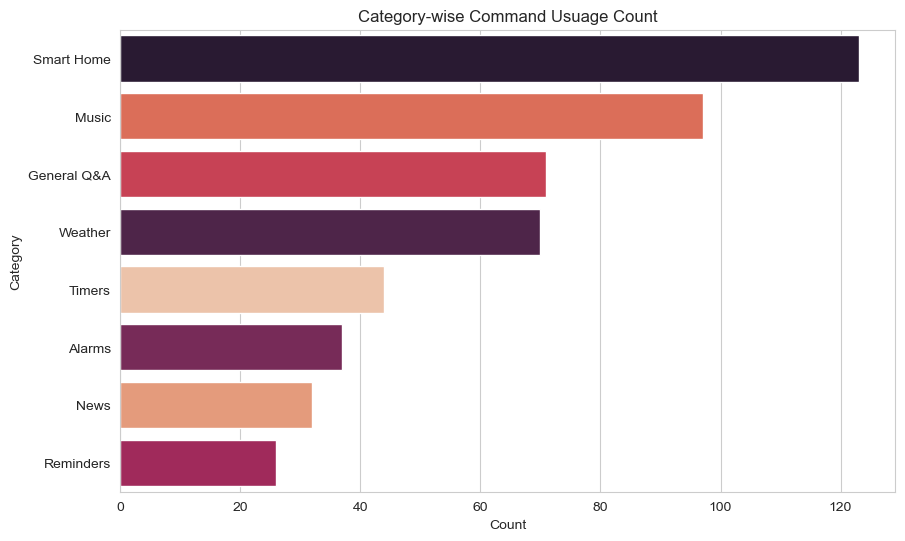

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='Category',
              data=df,
              order=df['Category'].value_counts().index,
              hue='Category',
              palette='rocket',
              legend=False)
plt.title('Category-wise Command Usuage Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

### 📊 Top 10 Most Used Commands


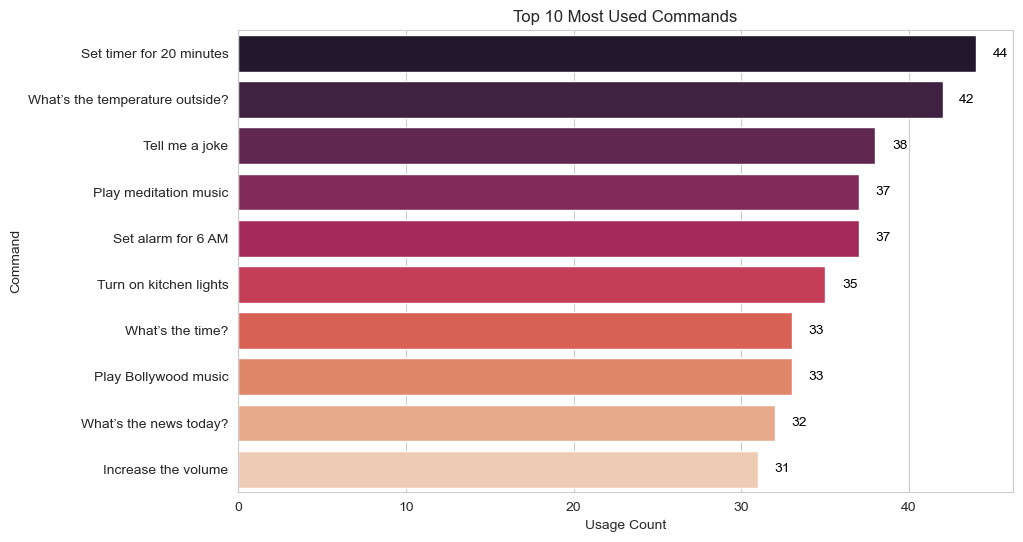

In [19]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_commands.values,
    y=top_commands.index,
    hue=top_commands.index,    # assign hue as command names
    dodge=False,               # prevent grouped bar effect
    palette='rocket',
    legend=False               # removes extra legend
)
plt.title('Top 10 Most Used Commands')
plt.xlabel('Usage Count')
plt.ylabel('Command')

# Adding count labels
for i, v in enumerate(top_commands.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.show()


### 📊 Device-wise Command Usage Distribution


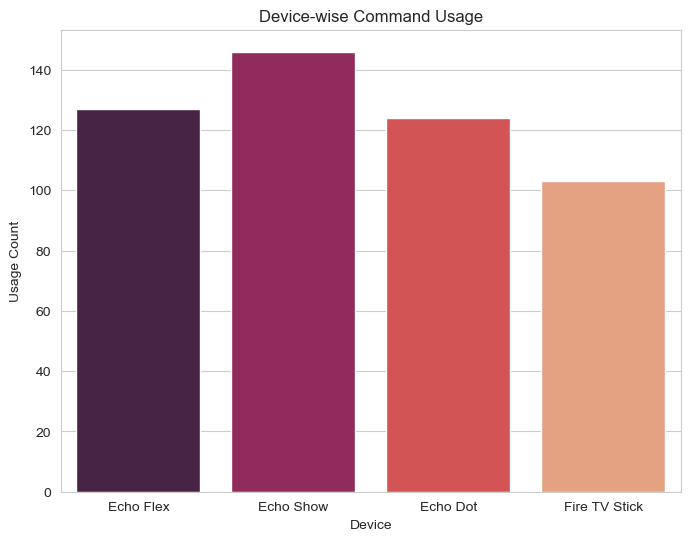

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Device',
              data=df,
              hue='Device',    # assign hue
              dodge=False,     # prevent group splitting
              palette='rocket',
              legend=False)    # remove redundant legend
plt.title('Device-wise Command Usage')
plt.xlabel('Device')
plt.ylabel('Usage Count')
plt.show()


### ⏰ Time-based Usage Pattern

Analyzing what time of the day users use Alexa the most.


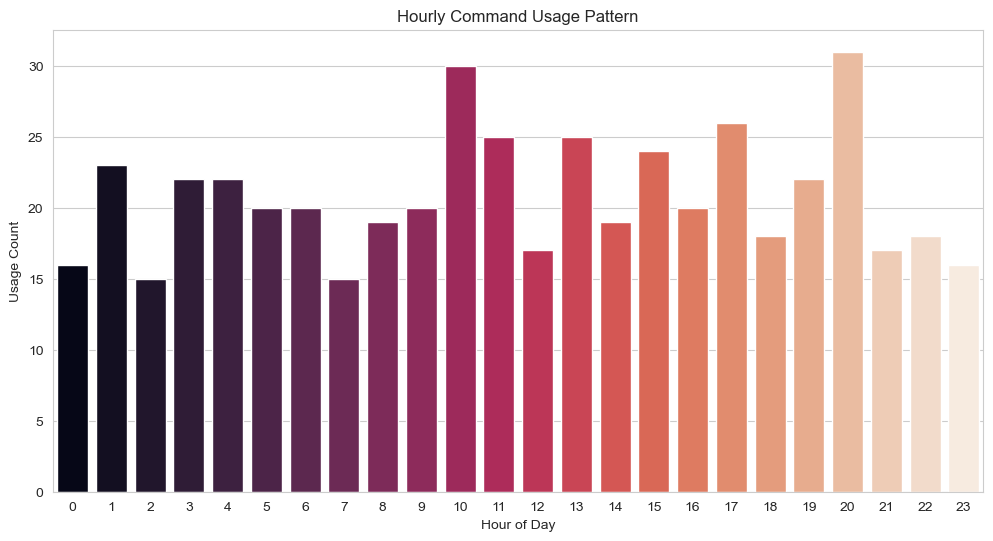

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour',
              data=df,
              hue='Hour',       # assign hue as Hour
              dodge=False,      # prevent group splitting
              palette='rocket',
              legend=False)     # remove redundant legend
plt.title('Hourly Command Usage Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Usage Count')
plt.show()


### ⏰ Average Duration per Category


C:\Users\bablu\AppData\Local\Temp\ipykernel_2608\3257358041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.values, y=avg_duration.index, palette='plasma')


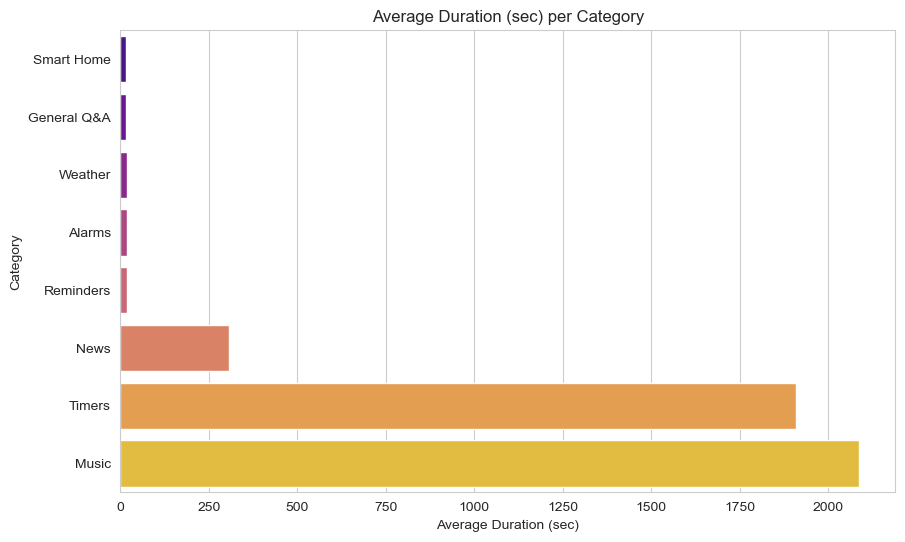

In [27]:
plt.figure(figsize=(10,6))
avg_duration = df.groupby('Category')['Duration_sec'].mean().sort_values()
sns.barplot(x=avg_duration.values, y=avg_duration.index, palette='plasma')
plt.title('Average Duration (sec) per Category')
plt.xlabel('Average Duration (sec)')
plt.ylabel('Category')
plt.show()
